In [1]:
#!pip install missingno
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import missingno as msno
from sklearn.tree import DecisionTreeClassifier

In [78]:
train = pd.read_csv("train_fix1.csv")
test = pd.read_csv("test_fix1.csv")

In [79]:
train['Weight_in_gms'].describe()

count    6553.000000
mean     3656.793224
std      1637.365487
min      1001.000000
25%      1852.000000
50%      4189.000000
75%      5066.000000
max      7846.000000
Name: Weight_in_gms, dtype: float64

In [80]:
train.describe(include=['O'])

,Warehouse_block,Mode_of_Shipment,Product_importance
count,6999,6999,6999
unique,5,4,4
top,F,Ship,high
freq,2311,4510,3345


In [81]:
train.isnull().sum()

Warehouse_block           0
Mode_of_Shipment          0
Customer_care_calls    1576
Customer_rating           0
Cost_of_the_Product       0
Prior_purchases         950
Product_importance        0
Discount_offered       3531
Weight_in_gms           446
Reached.on.Time_Y.N       0
dtype: int64

In [82]:
test.isnull().sum()

Warehouse_block           0
Mode_of_Shipment          0
Customer_care_calls     856
Customer_rating           0
Cost_of_the_Product       0
Prior_purchases         367
Product_importance        0
Discount_offered       1915
Weight_in_gms             0
dtype: int64

In [83]:
test['Weight_in_gms']
test_cleaned = test[test['Weight_in_gms'] != '?']


In [84]:
train_cl['Weight_in_gms'].fillna(0, inplace=True)
train_cl['Weight_in_gms'] = train_cl['Weight_in_gms'].astype('int64')


In [86]:
# 'Weight_in_gms'가 0이고 'Reached.on.Time_Y.N'가 1인 행의 개수 계산
count_condition = (train_cl['Weight_in_gms'] == 0) & (train_cl['Reached.on.Time_Y.N'] == 1)
count = len(train_cl[count_condition])

# 결과 출력
print(f'Number of rows where Weight_in_gms is 0 and Reached.on.Time_Y.N is 1: {count}')


Number of rows where Weight_in_gms is 0 and Reached.on.Time_Y.N is 1: 294


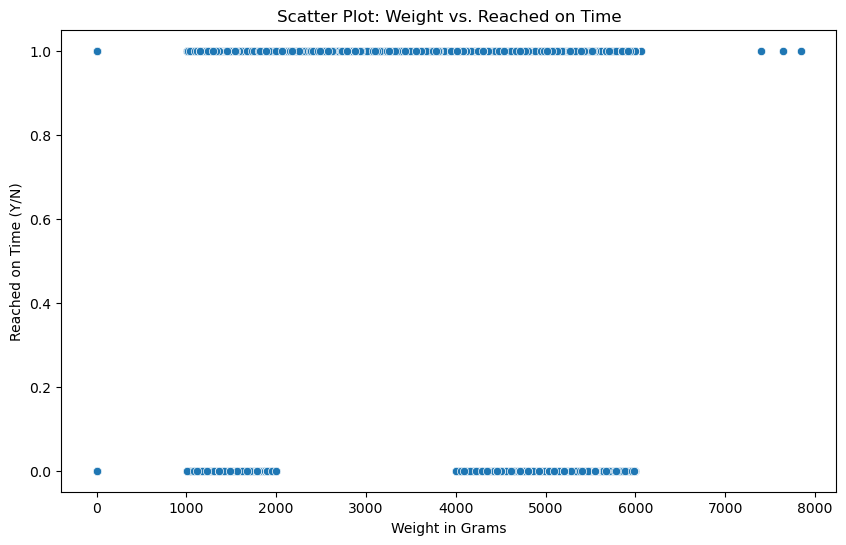

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 지정 (선택 사항)

sns.scatterplot(data=train_cl, x='Weight_in_gms', y='Reached.on.Time_Y.N')
plt.title('Scatter Plot: Weight vs. Reached on Time')  # 그래프 제목 지정 (선택 사항)
plt.xlabel('Weight in Grams')  # x 축 레이블 지정 (선택 사항)
plt.ylabel('Reached on Time (Y/N)')  # y 축 레이블 지정 (선택 사항)

plt.show()  # 그래프 출력


In [69]:
test_cleaned['Weight_in_gms'].info()

<class 'pandas.core.series.Series'>
Int64Index: 3748 entries, 0 to 3999
Series name: Weight_in_gms
Non-Null Count  Dtype 
--------------  ----- 
3748 non-null   object
dtypes: object(1)
memory usage: 58.6+ KB


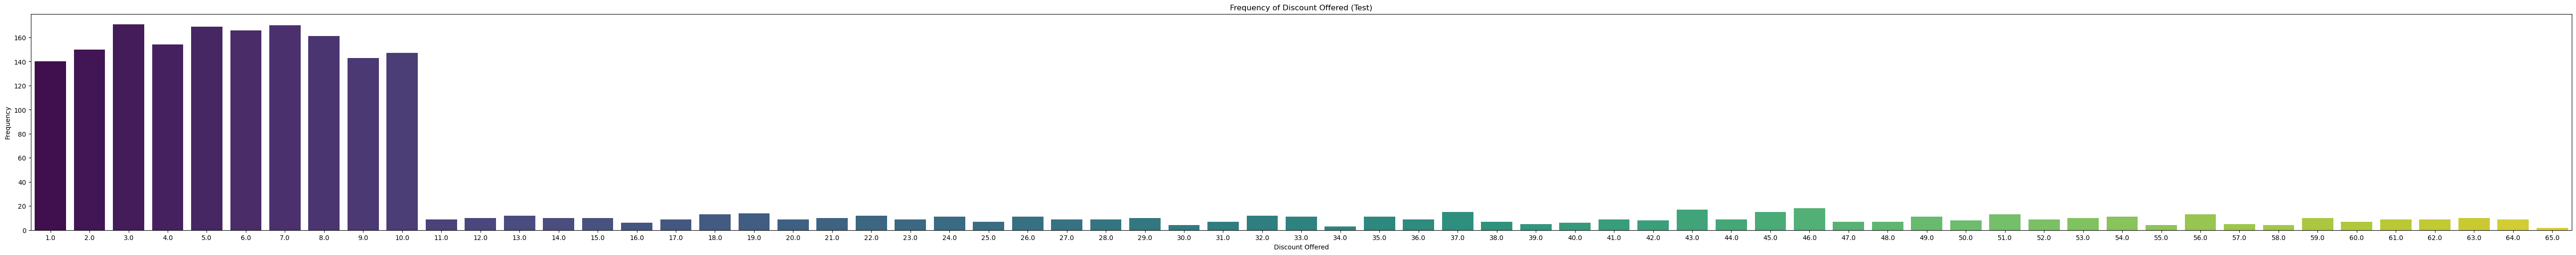

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'Discount_offered' 컬럼의 빈도수를 계산
value_counts = test['Discount_offered'].value_counts().reset_index()
value_counts.columns = ['Discount_offered', 'Frequency']

# 막대 그래프로 빈도수 시각화
plt.figure(figsize=(70, 6))  # 그래프 크기 지정 (선택 사항)

sns.barplot(data=value_counts, x='Discount_offered', y='Frequency', palette='viridis')
plt.title('Frequency of Discount Offered (Test)')  # 그래프 제목 지정 (선택 사항)
plt.xlabel('Discount Offered')  # x 축 레이블 지정 (선택 사항)
plt.ylabel('Frequency')  # y 축 레이블 지정 (선택 사항)

plt.show()  # 그래프 출력


In [4]:
test.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,7000,F,Ship,3.0,1,274,NaN,high,M,NaN,4352
1,7001,F,Ship,3.0,4,136,2.0,medium,F,NaN,1056
2,7002,A,Flight,NaN,5,140,3.0,low,F,7.0,5383
3,7003,C,Ship,NaN,1,291,4.0,low,F,NaN,1880
4,7004,F,?,4.0,2,147,3.0,low,F,5.0,5174


In [14]:
df= pd.read_csv('./sampleSubmission.csv')

In [15]:

df['Reached.on.Time_Y.N'] = 1
df

,ID,Reached.on.Time_Y.N
0,7000,1
1,7001,1
2,7002,1
3,7003,1
4,7004,1
...,...,...
3995,10995,1
3996,10996,1
3997,10997,1
3998,10998,1


In [16]:
df.to_csv('correct.csv', index=False)